# K Means Clustering Project 

For this project I will use KMeans Clustering to cluster Universities into to two groups, Private and Public.

___
It is worth noting that, although I have the labels for this dataset, I won't be using them in the algorithm, since this is an unsupervised method. It will be helpful to review the final output against these labels, but this is NOT something that would be possible in a RL situtation.


## The Data

The data frame I'm using for this project has 777 observations for the following 18 variables:
* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

## Getting the Data

In [2]:
df = pd.read_csv("College_Data", index_col = 0)

In [3]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 115.3+ KB


In [5]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## Exploratory Data Analysis (EDA)

All of the below plots will the color argument set by whether the university fr the observation is private or not. I am trying to get an idea of which variables show notable differeniation on this distinction.

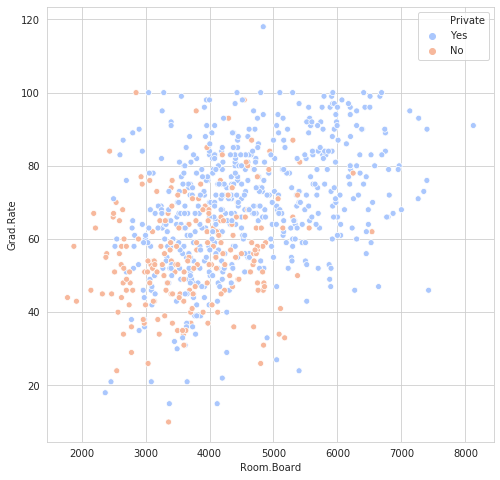

In [6]:
plt.figure(figsize = (8,8))
sns.scatterplot("Room.Board","Grad.Rate", data = df, hue = "Private", palette = "coolwarm")

It appears that both the graduation rate and the cost of room and board at private universities is higher than thier public counterparts. It is also immeadiately apparent that the dataset contains notably more obs for private universities than public.

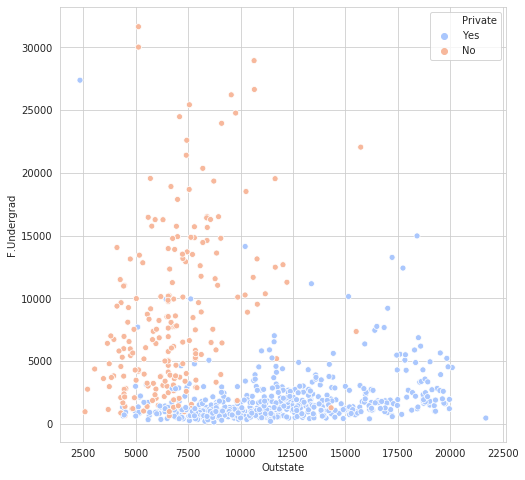

In [8]:
plt.figure(figsize = (8,8))
sns.scatterplot("Outstate", "F.Undergrad", hue = "Private", data = df, palette = "coolwarm")

The public universities clearly have lower out of state tuition rates, and frequently have notably more enrolled first-year undergrads.

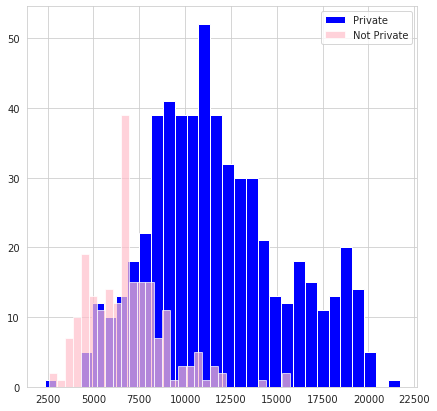

In [18]:
plt.figure(figsize = (7,7))
df[df["Private"] == "Yes"]["Outstate"].hist(color = "Blue", label = "Private", bins = 30)
df[df["Private"] == "No"]["Outstate"].hist(color = "Pink", label = "Not Private", bins = 30, alpha = 0.7)
plt.legend()

Here I have created a stacked histogram for the out of state tutitions, and the difference between the private and public universities is even more clear. 

The below stacjed histogram shows the comparative graduation rate for private and public universities. Again, we see that the rate for the public universiities is much lower. There is one university with very few students and a grad rate that has somehow been marked as being higher than 100%.

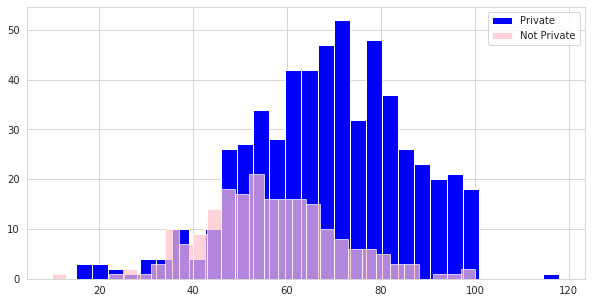

In [12]:
plt.figure(figsize = (10, 5))
df[df["Private"] == "Yes"]["Grad.Rate"].hist(color = "Blue", label = "Private", bins = 30)
df[df["Private"] == "No"]["Grad.Rate"].hist(color = "Pink", label = "Not Private", bins = 30, alpha = 0.7)
plt.legend()

In [28]:
df["Grad.Rate"].idxmax()

'Cazenovia College'

The aberrant university is Cazenovia College. I'll be setting their grad rate to 100%, as their listed value is erroneous. 

In [13]:
df.loc['Cazenovia College', "Grad.Rate"] = 100

In [14]:
df.loc['Cazenovia College']

Private         Yes
Apps           3847
Accept         3433
Enroll          527
Top10perc         9
Top25perc        35
F.Undergrad    1010
P.Undergrad      12
Outstate       9384
Room.Board     4840
Books           600
Personal        500
PhD              22
Terminal         47
S.F.Ratio      14.3
perc.alumni      20
Expend         7697
Grad.Rate       100
Name: Cazenovia College, dtype: object

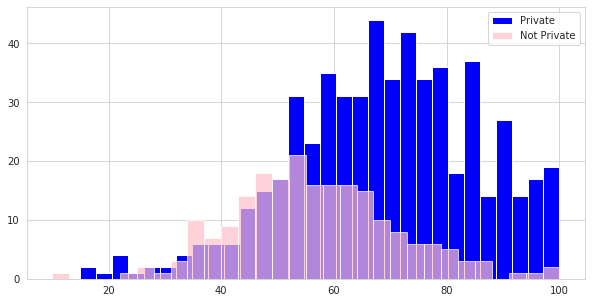

In [16]:
plt.figure(figsize = (10, 5))
df[df["Private"] == "Yes"]["Grad.Rate"].hist(color = "Blue", label = "Private", bins = 30)
df[df["Private"] == "No"]["Grad.Rate"].hist(color = "Pink", label = "Not Private", bins = 30, alpha = 0.7)
plt.legend()

Here is the same histo as above, but with Cazenovia's grad rate reset to 100%.

## K Means Cluster Creation

In [19]:
from sklearn.cluster import KMeans

Here I create my KMeans instance, set with 2 clusters, since I am creating clusters for two labels: "Private" and "Public".

In [20]:
kmeans = KMeans(n_clusters=2)

**Here I fit the model to the data, excluding the "Private" column, as that contains the labels.**

In [21]:
kmeans.fit(df.drop("Private", axis = 1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
kmeans.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

## Evaluation

In a real life scenario, there wouldn't be much more to do, outside of perhaps visualizing the results. Without labels, as is the case in unsupervised learning, there is no way to evaluate the predictive accuracy of the model. I can and will evaluate the model here, as I have the labels on hand, for practice.

In [31]:
df['Cluster'] = [int(bool(obs == "Yes")) for obs in df["Private"]]

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


** Create a confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels.**

In [37]:
pd.crosstab(df["Cluster"], kmeans.labels_)

col_0,0,1
Cluster,,
0,138,74
1,531,34


In [38]:
pd.crosstab(df["Cluster"], kmeans.labels_, normalize=True)

col_0,0,1
Cluster,,
0,0.177606,0.095238
1,0.683398,0.043758


In [39]:
print(classification_report(df["Cluster"], kmeans.labels_))

              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777

